In [1]:
from langgraph.graph import StateGraph, START, END
from langchain_openai import ChatOpenAI
from dotenv import load_dotenv
from langgraph.checkpoint.memory import InMemorySaver
from typing import TypedDict

In [2]:
load_dotenv()

True

In [3]:
llm = ChatOpenAI()

In [4]:
class JokeState(TypedDict):
    topic: str
    joke: str
    explanation: str

In [5]:
def generate_joke(state: JokeState):
    prompt = f"Generate a joke on the topic {state['topic']}"
    response = llm.invoke(prompt)
    return {'joke': response.content}

In [6]:
def explain_joke(state: JokeState):
    prompt = f"Write an explanation for the following joke: {state['joke']}"
    response = llm.invoke(prompt)
    return {'explanation': response.content}

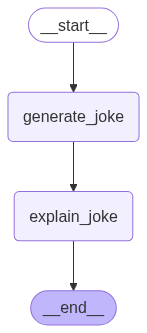

In [7]:
# Create a state graph
graph = StateGraph(JokeState)

# Add nodes to the graph
graph.add_node("generate_joke", generate_joke)
graph.add_node("explain_joke", explain_joke)

# Add edges to the graph
graph.add_edge(START, "generate_joke")
graph.add_edge("generate_joke", "explain_joke")
graph.add_edge("explain_joke", END)

# Compile the graph
checkpointer = InMemorySaver() # To save checkpoints for persistence
workflow = graph.compile(checkpointer=checkpointer)
workflow

In [8]:
initial_config = {
    "configurable": {"thread_id": "1"}
}

# Execute the workflow with an initial state
workflow.invoke({'topic': 'pizza'}, config=initial_config)

{'topic': 'pizza',
 'joke': 'Why did the pizza go to the doctor? Because it was feeling a little cheesy!',
 'explanation': 'This joke plays on the double meaning of the word "cheesy." In one sense, "cheesy" typically refers to something of low quality or inauthentic, often used to describe a joke or pun that is not very funny. In this case, the pizza is "feeling cheesy" because it is a pizza covered in cheese.\n\nHowever, in a more literal sense, "cheesy" can also refer to something that is overly sentimental or overly emotional. So, when the joke says the pizza went to the doctor because it was feeling "cheesy," it is playing on the idea that the pizza, covered in cheese, is feeling emotional or sentimental. This adds a humorous twist to the joke and makes it a clever play on words.'}

In [9]:
workflow.get_state(config=initial_config)

StateSnapshot(values={'topic': 'pizza', 'joke': 'Why did the pizza go to the doctor? Because it was feeling a little cheesy!', 'explanation': 'This joke plays on the double meaning of the word "cheesy." In one sense, "cheesy" typically refers to something of low quality or inauthentic, often used to describe a joke or pun that is not very funny. In this case, the pizza is "feeling cheesy" because it is a pizza covered in cheese.\n\nHowever, in a more literal sense, "cheesy" can also refer to something that is overly sentimental or overly emotional. So, when the joke says the pizza went to the doctor because it was feeling "cheesy," it is playing on the idea that the pizza, covered in cheese, is feeling emotional or sentimental. This adds a humorous twist to the joke and makes it a clever play on words.'}, next=(), config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f07010f-1a2f-6c42-8002-188aed129cca'}}, metadata={'source': 'loop', 'step': 2, 'parents': {

In [10]:
list(workflow.get_state_history(config=initial_config))

[StateSnapshot(values={'topic': 'pizza', 'joke': 'Why did the pizza go to the doctor? Because it was feeling a little cheesy!', 'explanation': 'This joke plays on the double meaning of the word "cheesy." In one sense, "cheesy" typically refers to something of low quality or inauthentic, often used to describe a joke or pun that is not very funny. In this case, the pizza is "feeling cheesy" because it is a pizza covered in cheese.\n\nHowever, in a more literal sense, "cheesy" can also refer to something that is overly sentimental or overly emotional. So, when the joke says the pizza went to the doctor because it was feeling "cheesy," it is playing on the idea that the pizza, covered in cheese, is feeling emotional or sentimental. This adds a humorous twist to the joke and makes it a clever play on words.'}, next=(), config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f07010f-1a2f-6c42-8002-188aed129cca'}}, metadata={'source': 'loop', 'step': 2, 'parents': 

In [11]:
config2 = {
    "configurable": {"thread_id": "2"}
}

workflow.invoke({'topic': 'cars'}, config=config2)

{'topic': 'cars',
 'joke': "Why did the car's engine break up with the transmission?\n\nBecause it couldn't handle the constant shifting in their relationship!",
 'explanation': 'This joke plays on the double meaning of the word "shifting." In the context of a relationship, "shifting" refers to changes or instability, while in the context of a car, it refers to changing gears. The joke humorously suggests that the engine and transmission of the car broke up because the engine couldn\'t handle the constant changing or shifting in their relationship, both metaphorically and literally.'}

In [12]:
workflow.get_state(config=config2)

StateSnapshot(values={'topic': 'cars', 'joke': "Why did the car's engine break up with the transmission?\n\nBecause it couldn't handle the constant shifting in their relationship!", 'explanation': 'This joke plays on the double meaning of the word "shifting." In the context of a relationship, "shifting" refers to changes or instability, while in the context of a car, it refers to changing gears. The joke humorously suggests that the engine and transmission of the car broke up because the engine couldn\'t handle the constant changing or shifting in their relationship, both metaphorically and literally.'}, next=(), config={'configurable': {'thread_id': '2', 'checkpoint_ns': '', 'checkpoint_id': '1f07010f-2acb-654c-8002-39396e8e9eaa'}}, metadata={'source': 'loop', 'step': 2, 'parents': {}, 'thread_id': '2'}, created_at='2025-08-03T02:24:14.167751+00:00', parent_config={'configurable': {'thread_id': '2', 'checkpoint_ns': '', 'checkpoint_id': '1f07010f-20cb-6ede-8001-40d1d536a0b1'}}, tasks=

In [13]:
list(workflow.get_state_history(config=config2))

[StateSnapshot(values={'topic': 'cars', 'joke': "Why did the car's engine break up with the transmission?\n\nBecause it couldn't handle the constant shifting in their relationship!", 'explanation': 'This joke plays on the double meaning of the word "shifting." In the context of a relationship, "shifting" refers to changes or instability, while in the context of a car, it refers to changing gears. The joke humorously suggests that the engine and transmission of the car broke up because the engine couldn\'t handle the constant changing or shifting in their relationship, both metaphorically and literally.'}, next=(), config={'configurable': {'thread_id': '2', 'checkpoint_ns': '', 'checkpoint_id': '1f07010f-2acb-654c-8002-39396e8e9eaa'}}, metadata={'source': 'loop', 'step': 2, 'parents': {}, 'thread_id': '2'}, created_at='2025-08-03T02:24:14.167751+00:00', parent_config={'configurable': {'thread_id': '2', 'checkpoint_ns': '', 'checkpoint_id': '1f07010f-20cb-6ede-8001-40d1d536a0b1'}}, tasks

In [14]:
workflow.get_state(config=initial_config).values

{'topic': 'pizza',
 'joke': 'Why did the pizza go to the doctor? Because it was feeling a little cheesy!',
 'explanation': 'This joke plays on the double meaning of the word "cheesy." In one sense, "cheesy" typically refers to something of low quality or inauthentic, often used to describe a joke or pun that is not very funny. In this case, the pizza is "feeling cheesy" because it is a pizza covered in cheese.\n\nHowever, in a more literal sense, "cheesy" can also refer to something that is overly sentimental or overly emotional. So, when the joke says the pizza went to the doctor because it was feeling "cheesy," it is playing on the idea that the pizza, covered in cheese, is feeling emotional or sentimental. This adds a humorous twist to the joke and makes it a clever play on words.'}

In [15]:
workflow.get_state(config=config2).values

{'topic': 'cars',
 'joke': "Why did the car's engine break up with the transmission?\n\nBecause it couldn't handle the constant shifting in their relationship!",
 'explanation': 'This joke plays on the double meaning of the word "shifting." In the context of a relationship, "shifting" refers to changes or instability, while in the context of a car, it refers to changing gears. The joke humorously suggests that the engine and transmission of the car broke up because the engine couldn\'t handle the constant changing or shifting in their relationship, both metaphorically and literally.'}

## Time Travel

In [16]:
workflow.get_state(config={"configurable": {"thread_id": "1", "checkpoint_id": "1f0700a1-aeeb-65f2-8000-e7e09abe8280"}})

StateSnapshot(values={}, next=(), config={'configurable': {'thread_id': '1', 'checkpoint_id': '1f0700a1-aeeb-65f2-8000-e7e09abe8280'}}, metadata=None, created_at=None, parent_config=None, tasks=(), interrupts=())

In [17]:
workflow.invoke(None, config={"configurable": {"thread_id": "1", "checkpoint_id": "1f0700a1-aeeb-65f2-8000-e7e09abe8280"}})

EmptyInputError: Received no input for __start__

In [ ]:
list(workflow.get_state_history(config=initial_config))

[StateSnapshot(values={'topic': 'pizza', 'joke': 'Why did the pizza go to the doctor? Because it was feeling a little saucy!', 'explanation': 'This joke plays on the double meaning of the word "saucy." In one sense, "saucy" means bold, cheeky, or sassy. In the other sense, "saucy" can also refer to having an excess of sauce, like on a pizza. So, the joke is saying that the pizza went to the doctor because it was feeling sassy (saucy), but it can also be interpreted as the pizza going to the doctor because it had too much sauce.'}, next=(), config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f0700f1-f806-676e-8002-5759bcdf9048'}}, metadata={'source': 'loop', 'step': 2, 'parents': {}, 'thread_id': '1'}, created_at='2025-08-03T02:11:10.381414+00:00', parent_config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f0700f1-eb7b-609e-8001-d6385fa39939'}}, tasks=(), interrupts=()),
 StateSnapshot(values={'topic': 'pizza', 'joke': 'Why d

## Updating State

In [ ]:
workflow.update_state({"configurable": {"thread_id": "1", "checkpoint_id": "1f0700a1-aeeb-65f2-8000-e7e09abe8280", "checkpoint_ns": ""}}, {"topic": "books"})

{'configurable': {'thread_id': '1',
  'checkpoint_ns': '',
  'checkpoint_id': '1f070101-beb9-667c-8001-03ffc0794ff7'}}

In [ ]:
list(workflow.get_state_history(config=initial_config))

[StateSnapshot(values={'topic': 'books'}, next=('generate_joke',), config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f070101-beb9-667c-8001-03ffc0794ff7'}}, metadata={'source': 'update', 'step': 1, 'parents': {}, 'thread_id': '1'}, created_at='2025-08-03T02:18:13.869715+00:00', parent_config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f0700a1-aeeb-65f2-8000-e7e09abe8280'}}, tasks=(PregelTask(id='bdca4260-7f14-c683-ad76-6e22231b8f0b', name='generate_joke', path=('__pregel_pull', 'generate_joke'), error=None, interrupts=(), state=None, result=None),), interrupts=()),
 StateSnapshot(values={'topic': 'pizza', 'joke': 'Why did the pizza go to the doctor? Because it was feeling a little saucy!', 'explanation': 'This joke plays on the double meaning of the word "saucy." In one sense, "saucy" means bold, cheeky, or sassy. In the other sense, "saucy" can also refer to having an excess of sauce, like on a pizza. So, the joke is say

In [ ]:
workflow.invoke(None, config={"configurable": {"thread_id": "1", "checkpoint_id": "1f070101-beb9-667c-8001-03ffc0794ff7"}})

{'topic': 'books',
 'joke': 'Why did the book go to the therapist? Because it had too many unresolved plot twists!',
 'explanation': 'This joke is playing on the idea that books often have complex and intricate plotlines with unexpected twists and turns. By saying that the book went to therapy because it had too many unresolved plot twists, it is implying that the book is struggling to make sense of its own story and is seeking emotional support to try and work through its issues. It humorously personifies the book and gives it human-like traits, making the punchline even more amusing.'}

In [ ]:
list(workflow.get_state_history(config=initial_config))

[StateSnapshot(values={'topic': 'books', 'joke': 'Why did the book go to the therapist? Because it had too many unresolved plot twists!', 'explanation': 'This joke is playing on the idea that books often have complex and intricate plotlines with unexpected twists and turns. By saying that the book went to therapy because it had too many unresolved plot twists, it is implying that the book is struggling to make sense of its own story and is seeking emotional support to try and work through its issues. It humorously personifies the book and gives it human-like traits, making the punchline even more amusing.'}, next=(), config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f07010c-6743-6fd6-8003-19963329c227'}}, metadata={'source': 'loop', 'step': 3, 'parents': {}, 'thread_id': '1'}, created_at='2025-08-03T02:22:59.977992+00:00', parent_config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f07010c-5cfa-6002-8002-fb5e6e211efe'}}, ta